In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [ ]:
df_X = diabetes['data']
df_y = diabetes['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state = 100)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(353, 10) (89, 10) (353,) (89,)


In [ ]:
W = np.random.rand(10)
b = np.random.rand()

In [ ]:
def model (W, X, b) :
  pred = 0
  for i in range(len(W)) :
    pred += X[:,i] * W[i]
  pred += b
  return pred


In [ ]:
def MSE(pred , target) :
  return ((pred - target) ** 2).mean()

In [ ]:
def loss (W, X, b, y) :
  y_pred = model(W, X, b)
  return MSE(y_pred, y)

In [ ]:
def gradient_MSE (W, X, b, y) :
  num = len(y)

  y_pred = model(W,X,b)

  dW = 2 * X.T.dot(y_pred-y) / num
  db = 2 * (y_pred - y).mean()

  return dW, db


In [ ]:
lr = 0.1

In [ ]:
losses = []

for i in range(1,5001) :
  dW , db = gradient_MSE(W, X_train, b, y_train)
  W -= lr * dW
  b -= lr * db
  Loss = loss(W, X_train, b, y_train)
  losses.append(Loss)
  if i % 100 == 0 :
    print("iteration %d : Loss : %0.4f" %(i, Loss))


iteration 100 : Loss : 5385.9250
iteration 200 : Loss : 4904.6065
iteration 300 : Loss : 4545.9618
iteration 400 : Loss : 4275.1515
iteration 500 : Loss : 4067.6084
iteration 600 : Loss : 3905.9711
iteration 700 : Loss : 3777.9378
iteration 800 : Loss : 3674.7616
iteration 900 : Loss : 3590.1971
iteration 1000 : Loss : 3519.7607
iteration 1100 : Loss : 3460.2132
iteration 1200 : Loss : 3409.1953
iteration 1300 : Loss : 3364.9727
iteration 1400 : Loss : 3326.2560
iteration 1500 : Loss : 3292.0744
iteration 1600 : Loss : 3261.6867
iteration 1700 : Loss : 3234.5179
iteration 1800 : Loss : 3210.1146
iteration 1900 : Loss : 3188.1133
iteration 2000 : Loss : 3168.2178
iteration 2100 : Loss : 3150.1828
iteration 2200 : Loss : 3133.8019
iteration 2300 : Loss : 3118.8995
iteration 2400 : Loss : 3105.3242
iteration 2500 : Loss : 3092.9441
iteration 2600 : Loss : 3081.6436
iteration 2700 : Loss : 3071.3201
iteration 2800 : Loss : 3061.8828
iteration 2900 : Loss : 3053.2500
iteration 3000 : Loss :

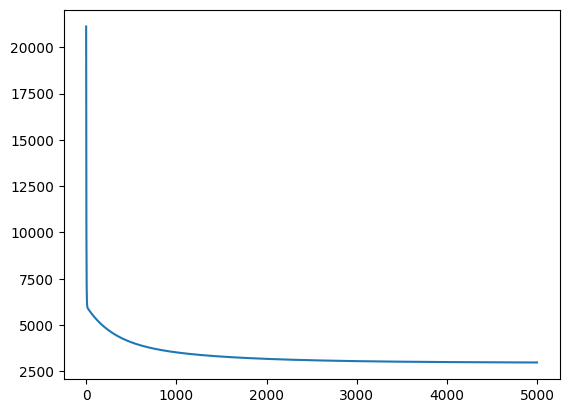

In [ ]:
plt.plot(losses)

In [ ]:
pred_test = model(W, X_test, b)
loss_test = loss(W, X_test, b, y_test)
print(loss_test)

2590.310796664164


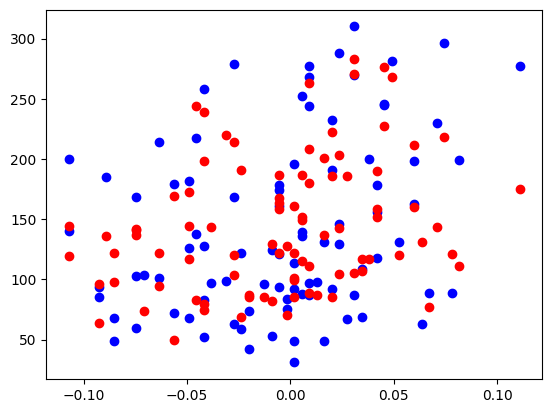

In [ ]:
plt.scatter(X_test[:, 0], y_test, c ='blue')
plt.scatter(X_test[:, 0], pred_test, c='red')
plt.show()

---
# 회고
loss 값이 너무 높다. 낮추려면 어떻게 해야할까?hmm